In [20]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
IMAGE_SIZE = [75, 75]
base_model = InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    #validation_split=0.2
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('Datasets/cell/train',
                                                 target_size=(75,75),
                                                 batch_size=64,
                                                 class_mode='categorical')
validation = test_datagen.flow_from_directory('Datasets/cell/validation', 
                                            target_size=(75,75),
                                            batch_size=64,
                                            class_mode='categorical')

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [8]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
345/345 [==============================] - 29s 85ms/step - loss: 0.4303 - accuracy: 0.8288 - val_loss: 0.4364 - val_accuracy: 0.7986
Epoch 2/30
345/345 [==============================] - 27s 79ms/step - loss: 0.3239 - accuracy: 0.8612 - val_loss: 0.4302 - val_accuracy: 0.7954
Epoch 3/30
345/345 [==============================] - 27s 79ms/step - loss: 0.3180 - accuracy: 0.8653 - val_loss: 0.4765 - val_accuracy: 0.7903
Epoch 4/30
345/345 [==============================] - 27s 79ms/step - loss: 0.3123 - accuracy: 0.8672 - val_loss: 0.4320 - val_accuracy: 0.8171
Epoch 5/30
345/345 [==============================] - 28s 81ms/step - loss: 0.2961 - accuracy: 0.8759 - val_loss: 0.4565 - val_accuracy: 0.7837
Epoch 6/30
345/345 [==============================] - 27s 79ms/step - loss: 0.2988 - accuracy: 0.8725 - val_loss: 0.4157 - val_accuracy: 0.8004
Epoch 7/30
345/345 [==============================] - 27s 80

In [9]:
for i, layer in enumerate(base_model .layers):
   print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [10]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Epoch 1/30
345/345 [==============================] - 36s 104ms/step - loss: 0.3196 - accuracy: 0.8639 - val_loss: 0.4300 - val_accuracy: 0.8182
Epoch 2/30
345/345 [==============================] - 34s 100ms/step - loss: 0.2631 - accuracy: 0.8937 - val_loss: 0.3382 - val_accuracy: 0.8701
Epoch 3/30
345/345 [==============================] - 34s 100ms/step - loss: 0.2384 - accuracy: 0.9037 - val_loss: 0.3247 - val_accuracy: 0.8643
Epoch 4/30
345/345 [==============================] - 35s 100ms/step - loss: 0.2316 - accuracy: 0.9055 - val_loss: 0.3528 - val_accuracy: 0.8556
Epoch 5/30
345/345 [==============================] - 36s 104ms/step - loss: 0.2270 - accuracy: 0.9107 - val_loss: 0.3810 - val_accuracy: 0.8541
Epoch 6/30
345/345 [==============================] - 36s 104ms/step - loss: 0.2122 - accuracy: 0.9145 - val_loss: 0.4179 - val_accuracy: 0.8501
Epoch 7/30
345/345 [==============================] - 37s 108ms/step - loss: 0.2115 - accuracy: 0.9144 - val_loss: 0.3801 - val_ac

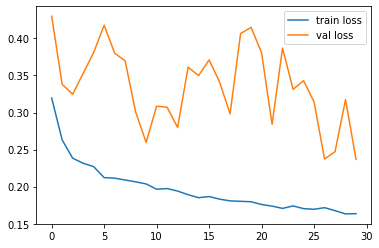

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


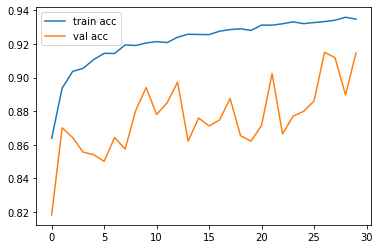

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
test = test_datagen.flow_from_directory('Datasets/cell/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2756 images belonging to 2 classes.


In [16]:
X_test,y_test=test.next()
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7812
